# Step1: Importing relevant Libraries and Dataset


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [22]:
customers_df = pd.read_csv("income.CSV")

# Step2: Visualizing the dataset

In [23]:
customers_df

,age,income
0,27,70000
1,29,90000
2,29,61000
3,28,60000
4,42,150000
5,39,155000
6,41,160000
7,38,162000
8,36,156000
9,35,130000


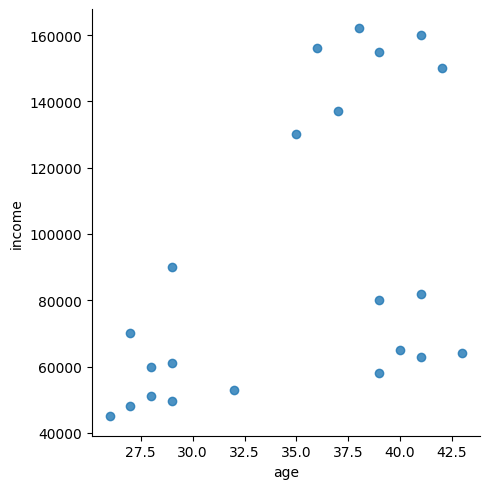

In [24]:
sns.lmplot(data=customers_df, x="age", y="income",fit_reg = False);

# Step3: Data Preperation 

In [25]:
clusters = KMeans(3)
clusters.fit(customers_df)

C:\Users\dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

The output variable clusters.labels_ contains labels that identify the cluster to which an observation belongs. We can concatenate it with the customers’ data and verify.

In [26]:
customers_df["clusterid"] = clusters.labels_

In [27]:
customers_df[0:5]

,age,income,clusterid
0,27,70000,2
1,29,90000,2
2,29,61000,0
3,28,60000,0
4,42,150000,1


Plotting Customers with Their Segments

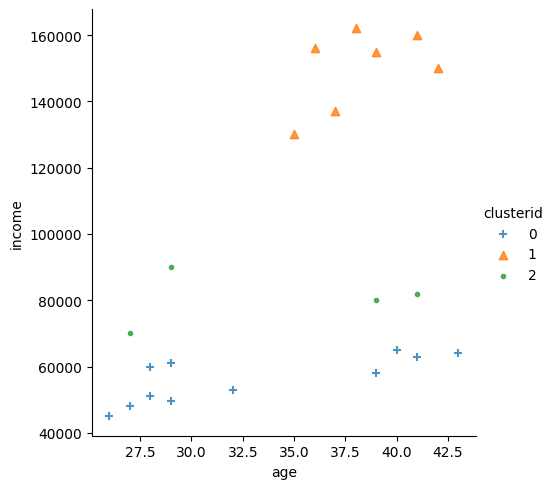

In [35]:
markers = ['+','^','.']
sns.lmplot(x="age",y="income",
           data = customers_df,
           hue = "clusterid",
           fit_reg = False,
           markers = markers
          );

Data normalization: because income column is overshadowing the age column 

In [29]:
scaler = StandardScaler()
scaled_customers_df = scaler.fit_transform(customers_df[["age","income"]])
scaled_customers_df[0:5]

array([[-1.35605536, -0.48068427],
       [-1.00915747, -0.01015907],
       [-1.00915747, -0.69242061],
       [-1.18260641, -0.71594687],
       [ 1.24567876,  1.40141653]])

# Step 4 :Visualization of Clusters

In [30]:
clusters_new = KMeans(3, random_state=42)
clusters_new.fit(scaled_customers_df)
customers_df["clusterid_new"] = clusters_new.labels_

C:\Users\dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [31]:
customers_df[0:5]

,age,income,clusterid,clusterid_new
0,27,70000,2,1
1,29,90000,2,1
2,29,61000,0,1
3,28,60000,0,1
4,42,150000,1,0


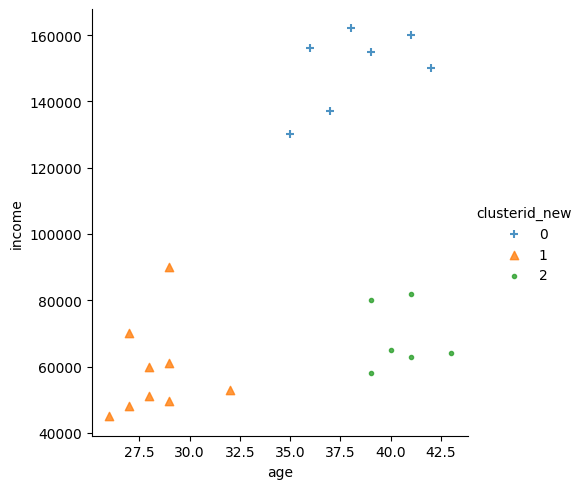

In [32]:
markers = ['+','^','.']
sns.lmplot(x="age", y="income",
            data = customers_df,
            hue = "clusterid_new",
            fit_reg = False,
            markers = markers
            );

In [33]:
clusters.cluster_centers_

array([[3.29090909e+01, 5.61363636e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.40000000e+01, 8.05000000e+04]])

# Step 5: Interpreting the Clusters
Each cluster is defined by its cluster center. The cluster center explains the characteristic of the cluster
and helps us to interpret the cluster. 

In [34]:
customers_df.groupby('clusterid')['age','income'].agg(['mean','std']).reset_index()

C:\Users\dell\AppData\Local\Temp\ipykernel_14888\1111317360.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  customers_df.groupby('clusterid')['age','income'].agg(['mean','std']).reset_index()


clusterid        age                   income              
                  mean       std           mean           std
0         0  32.909091  6.456850   56136.363636   7071.389217
1         1  38.285714  2.563480  150000.000000  12069.244660
2         2  34.000000  7.023769   80500.000000   8225.975120

The clusters can be interpreted as follows:
1. cluster0: Customers with mean age of 38 and income of 150k. High age and high income.
2. cluster1: Customers with mean age of 34 and income of 80.5K. Mid age and mid income.
3. cluster2: Customers with mean age of 32 and income of 56.1k. Low age and low income.